In this code, I am trying to identify pressure phases, using the conditions described in the paper:
Measuring the Effectiveness of Pressing in Soccer by
Simon Merckx,Pieter Robberechts,Yannick Euvrard and Jesse Davis


This is the first part of other works that will follow :)

In [ ]:
pip install -U mplsoccer

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import numpy as np
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

In [3]:
# Reading JSON data from a file
with open("2128286_tracking_data_ff.json") as f:
    json_data = json.load(f)

df = pd.DataFrame(json_data)
df.head(5)

,frame,event_id,type_id,ball_loc_x,ball_loc_y,ball_loc_x_opta,ball_loc_y_opta,adjusted_data
0,1391,2253487625,1,-9.6960,1.1800,40.7657,51.7354,"[{'team': 1, 'team_status': 'defense', 'x': 20..."
1,1411,2253487639,1,-22.2098,-0.3969,28.8478,49.4163,"[{'team': 1, 'team_status': 'defense', 'x': 23..."
2,1461,2253487685,1,-0.2291,-20.5120,49.7818,19.8353,"[{'team': 90, 'team_status': 'offense', 'x': 2..."
3,1501,2253487689,13,-1.0000,-1.0000,-1.0000,-1.0000,"[{'team': 90, 'team_status': 'offense', 'x': 3..."
4,1831,2253488053,1,-47.5980,-0.0597,4.6686,49.9122,"[{'team': 1, 'team_status': 'offense', 'x': -4..."


In [ ]:

positions = pd.DataFrame(columns= ['team',
  'team_status',
  'x',
  'x_opta',
  'y_opta',
  'y',
  'vx',
  'vy',
  'ax',
  'ay',
  'player_id',
  'player_position',
  'player_with_event'])


for i in range (len(df)):
  positions = positions.append(df['adjusted_data'][i])

positions = positions.reset_index()

club = []
for l in range (len(positions)):
  club.append('Man United' if (positions['team'][l] == 1) else 'Burnley')

club = pd.DataFrame(club, columns=['club'])
positions = pd.concat([positions,club], axis=1)

In [5]:
event = []
event_id = []

for j in range (len(df)):
  event.append(len(df['adjusted_data'][j]))

for k in range (len(df)):
  event_id.append((df['event_id'][k]))

event_id = list(map(int, event_id))

a = [i for i in range(1, len(df))]

result_event = [x for x, n in zip(a, event) for _ in range(n)]
result_event = pd.DataFrame({'event number': result_event})
result_event = result_event.reset_index()

result_event_id = [x for x, n in zip(event_id, event) for _ in range(n)]
result_event_id = pd.DataFrame({'eventId': result_event_id})
result_event_id = result_event_id.reset_index()

positions = pd.concat([positions,result_event,result_event_id], axis=1)
positions

,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,ay,player_id,player_position,player_with_event,club,index,event number,index,eventId
0,0,1,defense,20.5699,69.59,71.80,14.8252,0.1406,-0.2693,0.0,0.0,197365,RCB,False,Man United,0.0,1.0,0,2253487625
1,1,1,defense,19.6386,68.70,40.85,-6.2192,-0.3755,-0.0670,0.0,0.0,106760,LWB,False,Man United,1.0,1.0,1,2253487625
2,2,1,defense,20.9583,69.96,60.10,6.8664,0.2215,-0.1173,0.0,0.0,95658,LCB,False,Man United,2.0,1.0,2,2253487625
3,3,90,offense,1.3090,51.25,75.83,17.5660,3.4401,-1.7631,0.0,0.0,60689,RF,False,Burnley,3.0,1.0,3,2253487625
4,4,90,offense,-22.8974,28.19,77.05,18.3917,0.1564,0.7657,0.0,0.0,51927,LCB,False,Burnley,4.0,1.0,4,2253487625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938,7,90,defense,34.6946,83.04,87.71,25.6405,-2.0172,-3.1814,0.0,0.0,17761,RCB,False,Burnley,NaN,NaN,18938,2253526395
18939,8,90,defense,28.7331,77.36,85.74,24.3003,-4.3873,0.4457,0.0,0.0,172782,LM,False,Burnley,NaN,NaN,18939,2253526395
18940,9,90,defense,21.4941,70.47,79.71,20.2021,-1.3423,2.0635,0.0,0.0,60551,RM,False,Burnley,NaN,NaN,18940,2253526395
18941,10,1,offense,21.9937,70.95,88.52,26.1952,0.4118,0.6845,0.0,0.0,74208,RM,False,Man United,NaN,NaN,18941,2253526395


In [ ]:
# Reading JSON data from a file
with open("2128286_ev.json") as f:
    json_data3 = json.load(f)

json_data3 # contains a list with many lists inside


df3 = pd.DataFrame(json_data3)
df3

data3 = []
for i in range (len(df3)):
  for j in range (len(df3.columns)):
    data3.append(df3.iloc[i][j])

data3 = [event for event in data3 if event is not None]
data3

In [7]:
track_data = pd.DataFrame(data3, columns = ['eventId',
  'eventTypeId',
  'outcome',
  'min',
  'sec',
  'teamId',
  'playerId',
  'timeStamp',
  'qualifiers',
  'x',
  'y',
  'description'])

track_data.head(5)

,eventId,eventTypeId,outcome,min,sec,teamId,playerId,timeStamp,qualifiers,x,y,description
0,2253487625,1,True,0,0,90,60551,2021-01-12T20:16:48.181,"[{'qualifierId': 213, 'value': '3.1'}, {'quali...",50.3,50.3,Kick-off
1,2253487639,1,True,0,2,90,17761,2021-01-12T20:16:50.991,"[{'qualifierId': 178}, {'qualifierId': 213, 'v...",29.6,53.4,Successful Pass
2,2253487685,1,True,0,7,90,68983,2021-01-12T20:16:55.444,"[{'qualifierId': 1}, {'qualifierId': 213, 'val...",41.3,18.4,Successful Pass
3,2253487689,13,True,0,11,90,90517,2021-01-12T20:17:00.002,"[{'qualifierId': 108}, {'qualifierId': 55, 'va...",86.0,73.1,Miss
4,2253488053,1,True,0,44,1,51940,2021-01-12T20:17:33.017,"[{'qualifierId': 140, 'value': '42.2'}, {'qual...",4.8,49.6,Successful Pass


In [ ]:
track_data['eventTypeId'].value_counts()

In [51]:
pressure_United = positions
pressure_United = pressure_United[pressure_United['club'] == 'Man United']
player_with_event_burnley = positions[(positions['player_with_event'] == True) & (positions['club'] == 'Burnley')]
player_with_event_burnley.head(5)

,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,ay,player_id,player_position,player_with_event,club,index,event number,index,eventId
18,18,90,offense,0.1293,50.12,48.84,-0.7875,0.8250,-1.3456,0.0,0.0,60551,RM,True,Burnley,18.0,1.0,18,2253487625
23,4,90,offense,-23.8119,27.32,50.73,0.4966,2.7971,-1.3921,0.0,0.0,17761,RCB,True,Burnley,23.0,2.0,23,2253487639
42,5,90,offense,-5.1976,45.05,12.47,-25.5231,2.0853,-0.1079,0.0,0.0,68983,RWB,True,Burnley,42.0,3.0,42,2253487685
66,9,90,offense,37.4715,85.69,73.74,16.1444,3.7633,-2.3487,0.0,0.0,90517,LW,True,Burnley,66.0,4.0,66,2253487689
93,2,90,offense,11.9440,61.38,71.46,14.5911,3.5170,-2.1589,0.0,0.0,90517,LW,True,Burnley,93.0,7.0,93,2253488055


Keeping only players within a radius of 4m to the player with the ball.


In [ ]:
import numpy as np

# Create an empty 'distance' column in pressure_United
pressure_United['distance'] = np.nan

# Iterate over unique 'eventId' values in pressure_United
for event_id in pressure_United['eventId'].unique():
    # Get the single row corresponding to the current 'eventId' in player_with_event_burnley
    player_row = player_with_event_burnley[player_with_event_burnley['eventId'] == event_id]

    # Check if there is at least one row for the current 'eventId' in player_with_event_burnley
    if not player_row.empty:
        # Calculate Euclidean distance for each row in pressure_United
        pressure_United.loc[pressure_United['eventId'] == event_id, 'distance'] = np.sqrt(
            (player_row['x_opta'].values[0] - pressure_United.loc[pressure_United['eventId'] == event_id, 'x_opta'])**2 +
            (player_row['y_opta'].values[0] - pressure_United.loc[pressure_United['eventId'] == event_id, 'y_opta'])**2
        )
    else:
        # If there is no row for the current 'eventId' in player_with_event_burnley, set distance to NaN
        pressure_United.loc[pressure_United['eventId'] == event_id, 'distance'] = np.nan

# Now, pressure_United should have a 'distance' column containing the Euclidean distance for each row relative to the single row in player_with_event_burnley for each unique 'eventId'.


In [53]:
filtered_pressure_United = pressure_United[pressure_United['distance'] <=4]
filtered_pressure_United

,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,ay,player_id,player_position,player_with_event,club,index,event number,index,eventId,distance
96,5,1,defense,13.2910,62.66,71.82,14.8405,-1.4631,2.0774,0.0,0.0,74208,RM,False,Man United,96.0,7.0,96,2253488055,1.329662
113,2,1,defense,5.8250,55.55,76.97,18.3364,3.5012,1.2224,0.0,0.0,141746,AM,False,Man United,113.0,9.0,113,2253488095,3.432273
117,6,1,defense,11.5452,61.00,74.03,16.3396,-2.1653,1.7173,0.0,0.0,74208,RM,False,Man United,117.0,9.0,117,2253488095,3.630124
125,3,1,defense,8.8958,58.47,79.69,20.1887,3.4668,0.9506,0.0,0.0,141746,AM,False,Man United,125.0,10.0,125,2253488079,0.724707
129,7,1,defense,11.3548,60.81,78.82,19.5974,-0.1375,2.7323,0.0,0.0,74208,RM,False,Man United,129.0,10.0,129,2253488079,2.362054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18850,19,1,defense,18.5153,67.63,9.79,-27.3408,3.2897,0.5120,0.0,0.0,106760,LWB,False,Man United,18850.0,1342.0,18850,2253526309,3.206649
18869,6,1,defense,-33.8931,17.72,4.40,-31.0067,-2.3810,0.5780,0.0,0.0,-1,,False,Man United,18869.0,1344.0,18869,2253526361,1.260635
18878,6,1,defense,-27.8874,23.44,14.16,-24.3689,0.1562,4.2269,0.0,0.0,40720,CF,False,Man United,18878.0,1345.0,18878,2253526363,2.291659
18889,6,1,defense,-32.0488,19.48,17.36,-22.1961,-4.4615,-1.7140,0.0,0.0,40720,CF,False,Man United,18889.0,1346.0,18889,2253526369,3.329204


Calculating the angle between the players applying pressure and the carrier of the ball

In [54]:
import math

# Create an empty 'theta' column in the positions DataFrame
filtered_pressure_United['theta'] = 0.0

# Iterate over unique 'eventId' values in player_with_event_burnley
for event_id in player_with_event_burnley['eventId'].unique():
    # Get the corresponding row in player_with_event_burnley for the current 'eventId'
    player_with_event_event = player_with_event_burnley[player_with_event_burnley['eventId'] == event_id]

    # Iterate over all positions
    for index, row in filtered_pressure_United.iterrows():
        # Calculate the angle 'theta' and assign it to the corresponding row in the  DataFrame
        filtered_pressure_United.loc[index, 'theta'] = math.atan2(row['y_opta'] - player_with_event_event['y_opta'].values[0],
                                                                  row['x_opta'] - player_with_event_event['x_opta'].values[0])


filtered_pressure_United



<ipython-input-54-215395188fa4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pressure_United['theta'] = 0.0


,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,...,player_id,player_position,player_with_event,club,index,event number,index,eventId,distance,theta
96,5,1,defense,13.2910,62.66,71.82,14.8405,-1.4631,2.0774,0.0,...,74208,RM,False,Man United,96.0,7.0,96,2253488055,1.329662,0.929996
113,2,1,defense,5.8250,55.55,76.97,18.3364,3.5012,1.2224,0.0,...,141746,AM,False,Man United,113.0,9.0,113,2253488095,3.432273,1.050563
117,6,1,defense,11.5452,61.00,74.03,16.3396,-2.1653,1.7173,0.0,...,74208,RM,False,Man United,117.0,9.0,117,2253488095,3.630124,0.966130
125,3,1,defense,8.8958,58.47,79.69,20.1887,3.4668,0.9506,0.0,...,141746,AM,False,Man United,125.0,10.0,125,2253488079,0.724707,1.035178
129,7,1,defense,11.3548,60.81,78.82,19.5974,-0.1375,2.7323,0.0,...,74208,RM,False,Man United,129.0,10.0,129,2253488079,2.362054,1.003392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18850,19,1,defense,18.5153,67.63,9.79,-27.3408,3.2897,0.5120,0.0,...,106760,LWB,False,Man United,18850.0,1342.0,18850,2253526309,3.206649,-0.079444
18869,6,1,defense,-33.8931,17.72,4.40,-31.0067,-2.3810,0.5780,0.0,...,-1,,False,Man United,18869.0,1344.0,18869,2253526361,1.260635,-1.736998
18878,6,1,defense,-27.8874,23.44,14.16,-24.3689,0.1562,4.2269,0.0,...,40720,CF,False,Man United,18878.0,1345.0,18878,2253526363,2.291659,0.124060
18889,6,1,defense,-32.0488,19.48,17.36,-22.1961,-4.4615,-1.7140,0.0,...,40720,CF,False,Man United,18889.0,1346.0,18889,2253526369,3.329204,1.514405


In [55]:
filtered_pressure_United['theta_degrees'] = np.degrees(filtered_pressure_United['theta'])
filtered_pressure_United

<ipython-input-55-2531ab644036>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pressure_United['theta_degrees'] = np.degrees(filtered_pressure_United['theta'])


,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,...,player_position,player_with_event,club,index,event number,index,eventId,distance,theta,theta_degrees
96,5,1,defense,13.2910,62.66,71.82,14.8405,-1.4631,2.0774,0.0,...,RM,False,Man United,96.0,7.0,96,2253488055,1.329662,0.929996,53.284832
113,2,1,defense,5.8250,55.55,76.97,18.3364,3.5012,1.2224,0.0,...,AM,False,Man United,113.0,9.0,113,2253488095,3.432273,1.050563,60.192802
117,6,1,defense,11.5452,61.00,74.03,16.3396,-2.1653,1.7173,0.0,...,RM,False,Man United,117.0,9.0,117,2253488095,3.630124,0.966130,55.355199
125,3,1,defense,8.8958,58.47,79.69,20.1887,3.4668,0.9506,0.0,...,AM,False,Man United,125.0,10.0,125,2253488079,0.724707,1.035178,59.311302
129,7,1,defense,11.3548,60.81,78.82,19.5974,-0.1375,2.7323,0.0,...,RM,False,Man United,129.0,10.0,129,2253488079,2.362054,1.003392,57.490147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18850,19,1,defense,18.5153,67.63,9.79,-27.3408,3.2897,0.5120,0.0,...,LWB,False,Man United,18850.0,1342.0,18850,2253526309,3.206649,-0.079444,-4.551788
18869,6,1,defense,-33.8931,17.72,4.40,-31.0067,-2.3810,0.5780,0.0,...,,False,Man United,18869.0,1344.0,18869,2253526361,1.260635,-1.736998,-99.522644
18878,6,1,defense,-27.8874,23.44,14.16,-24.3689,0.1562,4.2269,0.0,...,CF,False,Man United,18878.0,1345.0,18878,2253526363,2.291659,0.124060,7.108105
18889,6,1,defense,-32.0488,19.48,17.36,-22.1961,-4.4615,-1.7140,0.0,...,CF,False,Man United,18889.0,1346.0,18889,2253526369,3.329204,1.514405,86.768990


Calculating the F coefficient (see the paper) and only keeping values above 35

In [56]:
import math

def calculate_F(d, q, Theta):
    z = (1 - np.cos((Theta))) / 2
    L = 3 + (9 - 3 * ((z**3) + 0.3 * z)) / 1.3
    F = ((1 - (d / L))**q) * 100
    return F


In [57]:
filtered_pressure_United['F_coeff'] = calculate_F(filtered_pressure_United['distance'],1.75,filtered_pressure_United['theta_degrees'])
filtered_pressure_United

<ipython-input-57-25c5d0d4eda1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pressure_United['F_coeff'] = calculate_F(filtered_pressure_United['distance'],1.75,filtered_pressure_United['theta_degrees'])


,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,...,player_with_event,club,index,event number,index,eventId,distance,theta,theta_degrees,F_coeff
96,5,1,defense,13.2910,62.66,71.82,14.8405,-1.4631,2.0774,0.0,...,False,Man United,96.0,7.0,96,2253488055,1.329662,0.929996,53.284832,68.967899
113,2,1,defense,5.8250,55.55,76.97,18.3364,3.5012,1.2224,0.0,...,False,Man United,113.0,9.0,113,2253488095,3.432273,1.050563,60.192802,33.375410
117,6,1,defense,11.5452,61.00,74.03,16.3396,-2.1653,1.7173,0.0,...,False,Man United,117.0,9.0,117,2253488095,3.630124,0.966130,55.355199,43.700716
125,3,1,defense,8.8958,58.47,79.69,20.1887,3.4668,0.9506,0.0,...,False,Man United,125.0,10.0,125,2253488079,0.724707,1.035178,59.311302,83.021400
129,7,1,defense,11.3548,60.81,78.82,19.5974,-0.1375,2.7323,0.0,...,False,Man United,129.0,10.0,129,2253488079,2.362054,1.003392,57.490147,61.577458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18850,19,1,defense,18.5153,67.63,9.79,-27.3408,3.2897,0.5120,0.0,...,False,Man United,18850.0,1342.0,18850,2253526309,3.206649,-0.079444,-4.551788,46.613028
18869,6,1,defense,-33.8931,17.72,4.40,-31.0067,-2.3810,0.5780,0.0,...,False,Man United,18869.0,1344.0,18869,2253526361,1.260635,-1.736998,-99.522644,78.445322
18878,6,1,defense,-27.8874,23.44,14.16,-24.3689,0.1562,4.2269,0.0,...,False,Man United,18878.0,1345.0,18878,2253526363,2.291659,0.124060,7.108105,62.749416
18889,6,1,defense,-32.0488,19.48,17.36,-22.1961,-4.4615,-1.7140,0.0,...,False,Man United,18889.0,1346.0,18889,2253526369,3.329204,1.514405,86.768990,47.600701


In [58]:
filtered_pressure_United = filtered_pressure_United[filtered_pressure_United['F_coeff'] >= 35]
filtered_pressure_United

,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,...,player_with_event,club,index,event number,index,eventId,distance,theta,theta_degrees,F_coeff
96,5,1,defense,13.2910,62.66,71.82,14.8405,-1.4631,2.0774,0.0,...,False,Man United,96.0,7.0,96,2253488055,1.329662,0.929996,53.284832,68.967899
117,6,1,defense,11.5452,61.00,74.03,16.3396,-2.1653,1.7173,0.0,...,False,Man United,117.0,9.0,117,2253488095,3.630124,0.966130,55.355199,43.700716
125,3,1,defense,8.8958,58.47,79.69,20.1887,3.4668,0.9506,0.0,...,False,Man United,125.0,10.0,125,2253488079,0.724707,1.035178,59.311302,83.021400
129,7,1,defense,11.3548,60.81,78.82,19.5974,-0.1375,2.7323,0.0,...,False,Man United,129.0,10.0,129,2253488079,2.362054,1.003392,57.490147,61.577458
148,2,1,defense,12.9265,62.31,77.49,18.6958,3.1690,-1.4391,0.0,...,False,Man United,148.0,12.0,148,2253488107,1.756502,0.977679,56.016883,70.979742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18850,19,1,defense,18.5153,67.63,9.79,-27.3408,3.2897,0.5120,0.0,...,False,Man United,18850.0,1342.0,18850,2253526309,3.206649,-0.079444,-4.551788,46.613028
18869,6,1,defense,-33.8931,17.72,4.40,-31.0067,-2.3810,0.5780,0.0,...,False,Man United,18869.0,1344.0,18869,2253526361,1.260635,-1.736998,-99.522644,78.445322
18878,6,1,defense,-27.8874,23.44,14.16,-24.3689,0.1562,4.2269,0.0,...,False,Man United,18878.0,1345.0,18878,2253526363,2.291659,0.124060,7.108105,62.749416
18889,6,1,defense,-32.0488,19.48,17.36,-22.1961,-4.4615,-1.7140,0.0,...,False,Man United,18889.0,1346.0,18889,2253526369,3.329204,1.514405,86.768990,47.600701


Keeping only players with a velocity higher than 1 m/s

In [75]:
filtered_pressure_United['speed'] = np.sqrt(filtered_pressure_United['vx']**2 + filtered_pressure_United['vy']**2)
filtered_pressure_United

<ipython-input-75-c2e4b5595e39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pressure_United['speed'] = np.sqrt(filtered_pressure_United['vx']**2 + filtered_pressure_United['vy']**2)


,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,...,index,event number,index,eventId,distance,theta,theta_degrees,F_coeff,pitch_control,speed
0,5,1,defense,13.2910,62.66,71.82,14.8405,-1.4631,2.0774,0.0,...,96.0,7.0,96,2253488055,1.329662,0.929996,53.284832,68.967899,0.998747,2.540916
1,6,1,defense,11.5452,61.00,74.03,16.3396,-2.1653,1.7173,0.0,...,117.0,9.0,117,2253488095,3.630124,0.966130,55.355199,43.700716,0.998747,2.763629
2,3,1,defense,8.8958,58.47,79.69,20.1887,3.4668,0.9506,0.0,...,125.0,10.0,125,2253488079,0.724707,1.035178,59.311302,83.021400,0.998747,3.594766
3,7,1,defense,11.3548,60.81,78.82,19.5974,-0.1375,2.7323,0.0,...,129.0,10.0,129,2253488079,2.362054,1.003392,57.490147,61.577458,0.998747,2.735758
4,2,1,defense,12.9265,62.31,77.49,18.6958,3.1690,-1.4391,0.0,...,148.0,12.0,148,2253488107,1.756502,0.977679,56.016883,70.979742,0.998747,3.480455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,19,1,defense,18.5153,67.63,9.79,-27.3408,3.2897,0.5120,0.0,...,18850.0,1342.0,18850,2253526309,3.206649,-0.079444,-4.551788,46.613028,0.998747,3.329305
402,6,1,defense,-33.8931,17.72,4.40,-31.0067,-2.3810,0.5780,0.0,...,18869.0,1344.0,18869,2253526361,1.260635,-1.736998,-99.522644,78.445322,0.998747,2.450152
403,6,1,defense,-27.8874,23.44,14.16,-24.3689,0.1562,4.2269,0.0,...,18878.0,1345.0,18878,2253526363,2.291659,0.124060,7.108105,62.749416,0.998747,4.229785
404,6,1,defense,-32.0488,19.48,17.36,-22.1961,-4.4615,-1.7140,0.0,...,18889.0,1346.0,18889,2253526369,3.329204,1.514405,86.768990,47.600701,0.998747,4.779412


In [78]:
filtered_pressure_United = filtered_pressure_United[filtered_pressure_United['speed'] >= 1]
filtered_pressure_United

,index,team,team_status,x,x_opta,y_opta,y,vx,vy,ax,...,index,event number,index,eventId,distance,theta,theta_degrees,F_coeff,pitch_control,speed
0,5,1,defense,13.2910,62.66,71.82,14.8405,-1.4631,2.0774,0.0,...,96.0,7.0,96,2253488055,1.329662,0.929996,53.284832,68.967899,0.998747,2.540916
1,6,1,defense,11.5452,61.00,74.03,16.3396,-2.1653,1.7173,0.0,...,117.0,9.0,117,2253488095,3.630124,0.966130,55.355199,43.700716,0.998747,2.763629
2,3,1,defense,8.8958,58.47,79.69,20.1887,3.4668,0.9506,0.0,...,125.0,10.0,125,2253488079,0.724707,1.035178,59.311302,83.021400,0.998747,3.594766
3,7,1,defense,11.3548,60.81,78.82,19.5974,-0.1375,2.7323,0.0,...,129.0,10.0,129,2253488079,2.362054,1.003392,57.490147,61.577458,0.998747,2.735758
4,2,1,defense,12.9265,62.31,77.49,18.6958,3.1690,-1.4391,0.0,...,148.0,12.0,148,2253488107,1.756502,0.977679,56.016883,70.979742,0.998747,3.480455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,19,1,defense,18.5153,67.63,9.79,-27.3408,3.2897,0.5120,0.0,...,18850.0,1342.0,18850,2253526309,3.206649,-0.079444,-4.551788,46.613028,0.998747,3.329305
402,6,1,defense,-33.8931,17.72,4.40,-31.0067,-2.3810,0.5780,0.0,...,18869.0,1344.0,18869,2253526361,1.260635,-1.736998,-99.522644,78.445322,0.998747,2.450152
403,6,1,defense,-27.8874,23.44,14.16,-24.3689,0.1562,4.2269,0.0,...,18878.0,1345.0,18878,2253526363,2.291659,0.124060,7.108105,62.749416,0.998747,4.229785
404,6,1,defense,-32.0488,19.48,17.36,-22.1961,-4.4615,-1.7140,0.0,...,18889.0,1346.0,18889,2253526369,3.329204,1.514405,86.768990,47.600701,0.998747,4.779412


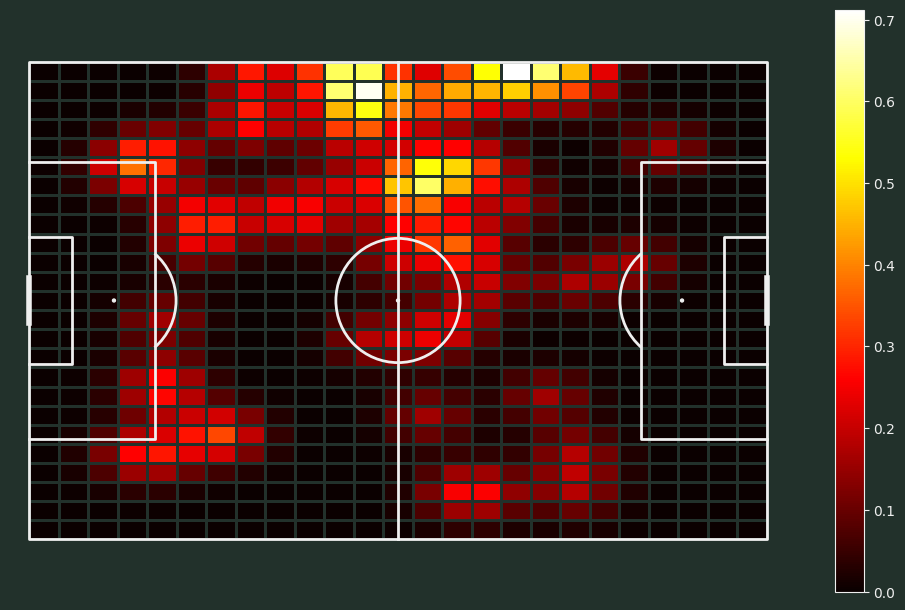

In [80]:
# setup pitch
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(10,10))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(filtered_pressure_United[filtered_pressure_United['player_id'] == 141746].x_opta, filtered_pressure_United[filtered_pressure_United['player_id'] == 141746].y_opta, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

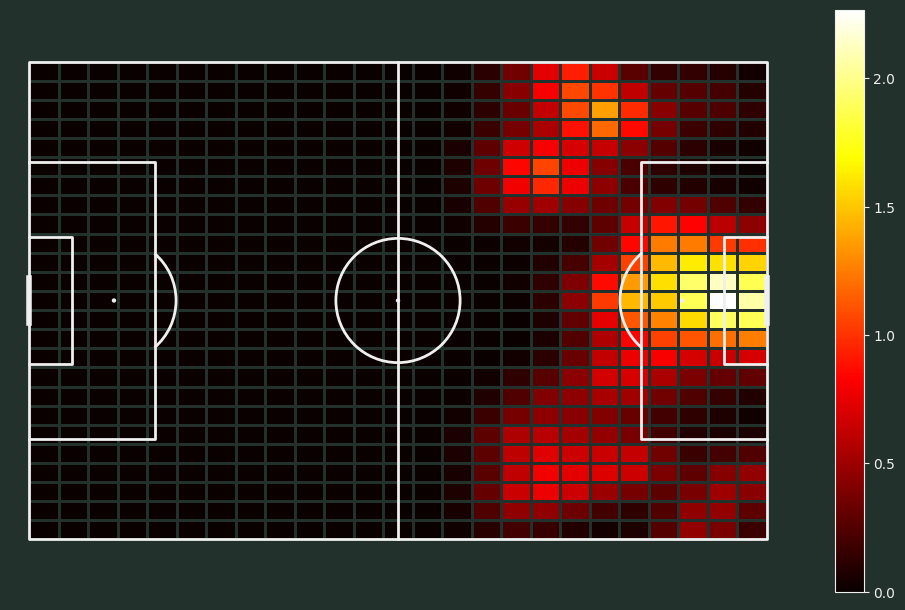

In [81]:
filtered_pressure_United_final3rd = filtered_pressure_United[filtered_pressure_United['x_opta'] >= 66]
# setup pitch
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(10,10))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(filtered_pressure_United_final3rd.x_opta, filtered_pressure_United_final3rd.y_opta, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

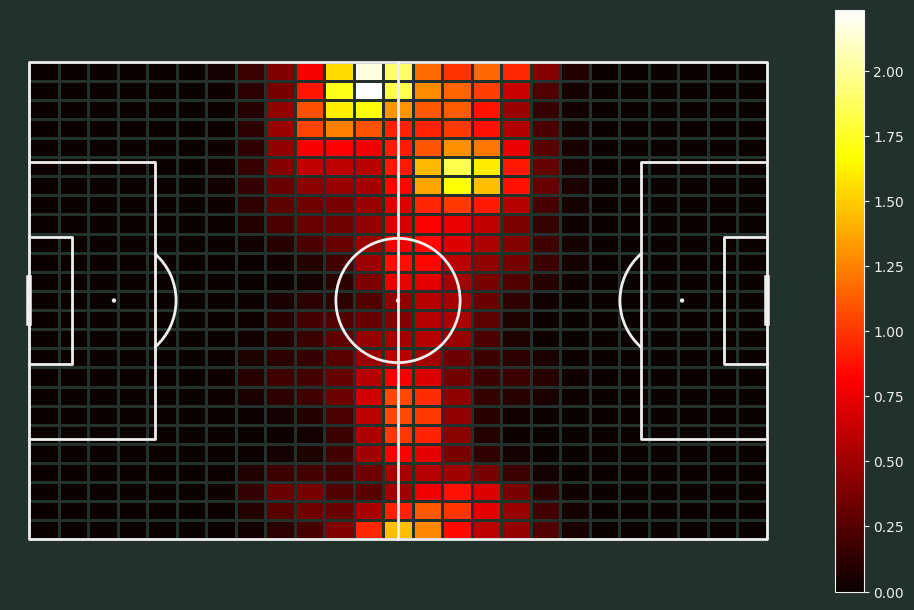

In [82]:
filtered_pressure_United_second3rd = filtered_pressure_United[(filtered_pressure_United['x_opta'] >= 33) & (filtered_pressure_United['x_opta'] <66)]
# setup pitch
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(10,10))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(filtered_pressure_United_second3rd.x_opta, filtered_pressure_United_second3rd.y_opta, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

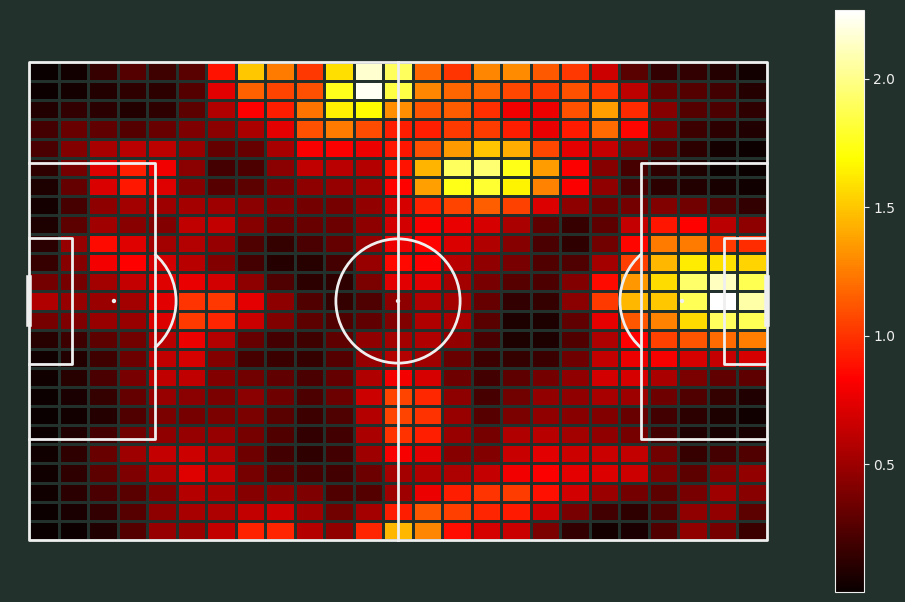

In [79]:
pitch = Pitch(pitch_type='opta', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(10,10))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(filtered_pressure_United.x_opta, filtered_pressure_United.y_opta, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
